**Bayesian stats notes**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm

sns.set_context("talk")  # visual theme

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

# Different beta distributions

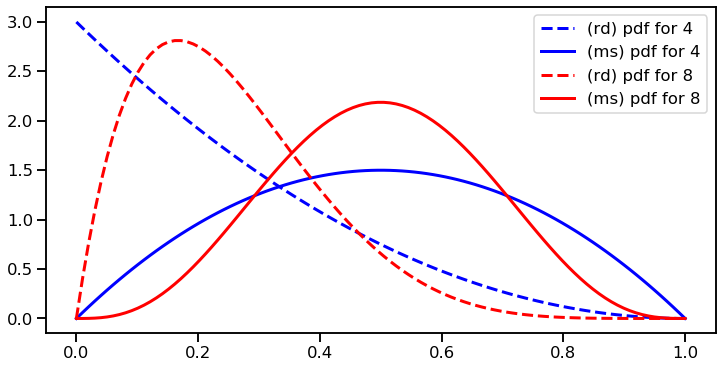

<IPython.core.display.Javascript object>

In [71]:
f, ax1 = plt.subplots(figsize=(12, 6))
color_list = ["blue", "red", "green", "orange", "black"]
# for i, total_ab in enumerate([4, 5, 6, 7, 8]):
for i, total_ab in enumerate([4, 8]):
    a_rd, b_rd = round(0.25 * total_ab), round(0.75 * total_ab)
    # print(a_rd, b_rd)
    x = np.linspace(beta.ppf(0.00, a_rd, b_rd), beta.ppf(1.00, a_rd, b_rd), 100)
    this_label = "(rd) pdf for " + str(total_ab)
    ax1.plot(
        x,
        beta.pdf(x, a_rd, b_rd),
        lw=3,
        linestyle="dashed",
        color=color_list[i],
        label=this_label,
    )

    a_ms, b_ms = round(0.5 * total_ab), round(0.5 * total_ab)
    # print(a_ms, b_ms)
    x = np.linspace(beta.ppf(0.00, a_rd, b_rd), beta.ppf(1.00, a_rd, b_rd), 100)
    this_label = "(ms) pdf for " + str(total_ab)
    ax1.plot(x, beta.pdf(x, a_ms, b_ms), lw=3, color=color_list[i], label=this_label)


ax1.legend()

# Evaluating multiple choice problem

In [14]:
# c that is very low 0
for n in [4, 5, 6, 7, 8]:
    c = 0
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 0 posterior odds ratio: 50.6
n: 5 c: 0 posterior odds ratio: 134.8
n: 6 c: 0 posterior odds ratio: 359.6
n: 7 c: 0 posterior odds ratio: 958.9
n: 8 c: 0 posterior odds ratio: 2557.1


<IPython.core.display.Javascript object>

In [10]:
# c that is very low 0.1
for n in [4, 5, 6, 7, 8]:
    c = 0.1
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 0.1 posterior odds ratio: 49.1
n: 5 c: 0.1 posterior odds ratio: 131.0
n: 6 c: 0.1 posterior odds ratio: 349.4
n: 7 c: 0.1 posterior odds ratio: 931.7
n: 8 c: 0.1 posterior odds ratio: 2484.6


<IPython.core.display.Javascript object>

In [11]:
# c that is for a non-mastery student
for n in [4, 5, 6, 7, 8]:
    c = 0.25 * n
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 1.0 posterior odds ratio: 37.9
n: 5 c: 1.25 posterior odds ratio: 94.1
n: 6 c: 1.5 posterior odds ratio: 233.6
n: 7 c: 1.75 posterior odds ratio: 579.6
n: 8 c: 2.0 posterior odds ratio: 1438.4


<IPython.core.display.Javascript object>

In [12]:
# c for a mastery student
for n in [4, 5, 6, 7, 8]:
    c = 0.5 * n
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 2.0 posterior odds ratio: 28.4
n: 5 c: 2.5 posterior odds ratio: 65.7
n: 6 c: 3.0 posterior odds ratio: 151.7
n: 7 c: 3.5 posterior odds ratio: 350.3
n: 8 c: 4.0 posterior odds ratio: 809.1


<IPython.core.display.Javascript object>

In [13]:
# c = all correct
for n in [4, 5, 6, 7, 8]:
    c = n
    post_odds_ratio = (0.5 ** n) / ((0.25 ** n) * (0.75) ** (n - c))
    print("n:", n, "c:", c, "posterior odds ratio: {0:0.1f}".format(post_odds_ratio))

n: 4 c: 4 posterior odds ratio: 16.0
n: 5 c: 5 posterior odds ratio: 32.0
n: 6 c: 6 posterior odds ratio: 64.0
n: 7 c: 7 posterior odds ratio: 128.0
n: 8 c: 8 posterior odds ratio: 256.0


<IPython.core.display.Javascript object>

By this reasoning, I would choose 5 because it is the only one with a posterior odds ratio that is greater than or equal to 19 in all values of c.

## Binomial distribution

### Probability mass function

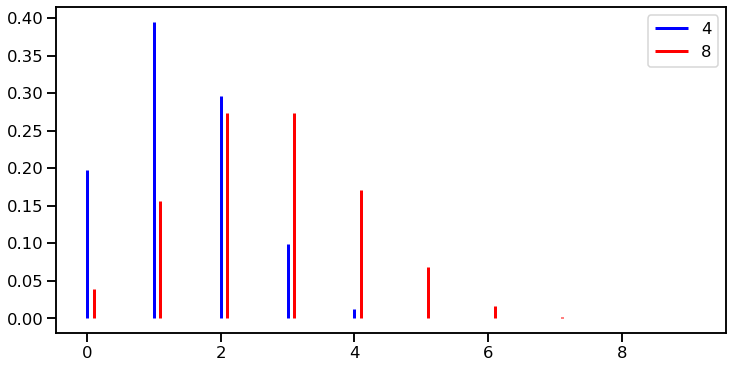

<IPython.core.display.Javascript object>

In [48]:
f, ax1 = plt.subplots(figsize=(12, 6))
color_list = ["blue", "red", "green", "orange", "black"]
# for i, n in enumerate([4, 5, 6, 7, 8]):
for i, n in enumerate([4, 8]):
    rv = binom(n, (1 / 3))
    x = np.arange(0, 10)
    # ax1.plot(x, rv.pmf(x), lw=1, color=color_list[i], label=str(n))
    ax1.vlines(x + i / 10, 0, rv.pmf(x), lw=3, color=color_list[i], label=str(n))
ax1.legend()

Where is the left bound where the cumulative distribution is 5%?

In [51]:
rv.cdf(x)

array([0.03901844, 0.19509221, 0.46822131, 0.7413504 , 0.91205609,
       0.98033836, 0.99740893, 0.99984758, 1.        , 1.        ])

<IPython.core.display.Javascript object>

In [52]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>

## Probability mass function with different probabilities

In [ ]:
f, ax1 = plt.subplots(figsize=(12, 6))
color_list = ["blue", "red", "green", "orange", "black"]
# for i, n in enumerate([4, 5, 6, 7, 8]):
for i, n in enumerate([4, 8]):
    rv = binom(n, (1 / 3))
    x = np.arange(0, 10)
    # ax1.plot(x, rv.pmf(x), lw=1, color=color_list[i], label=str(n))
    ax1.vlines(x + i / 10, 0, rv.pmf(x), lw=3, color=color_list[i], label=str(n))
ax1.legend()

Text(0.5, 1.0, 'Probability distribution after n plate appearances')

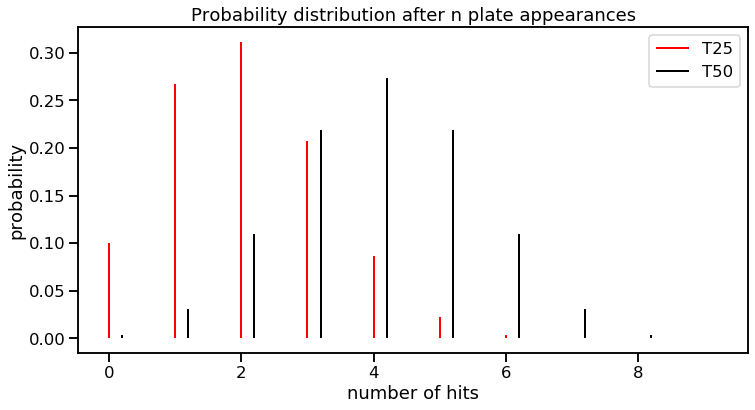

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# T25 group
n25, p25 = 8, 0.25
rv25 = binom(n25, p25)
x = np.arange(0, 10)
ax.vlines(x, 0, rv25.pmf(x25), colors="r", linestyles="-", lw=2, label="T25")


# T50 group
n50, p50 = 8, 0.50
rv50 = binom(n50, p50)
x = np.arange(0, 10)
ax.vlines(x + 0.2, 0, rv50.pmf(x), colors="k", linestyles="-", lw=2, label="T50")

# Formatting
ax.legend()
ax.set_ylabel("probability")
ax.set_xlabel("number of hits")
ax.set_title("Probability distribution after n plate appearances")
